In [2]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv('train.csv')

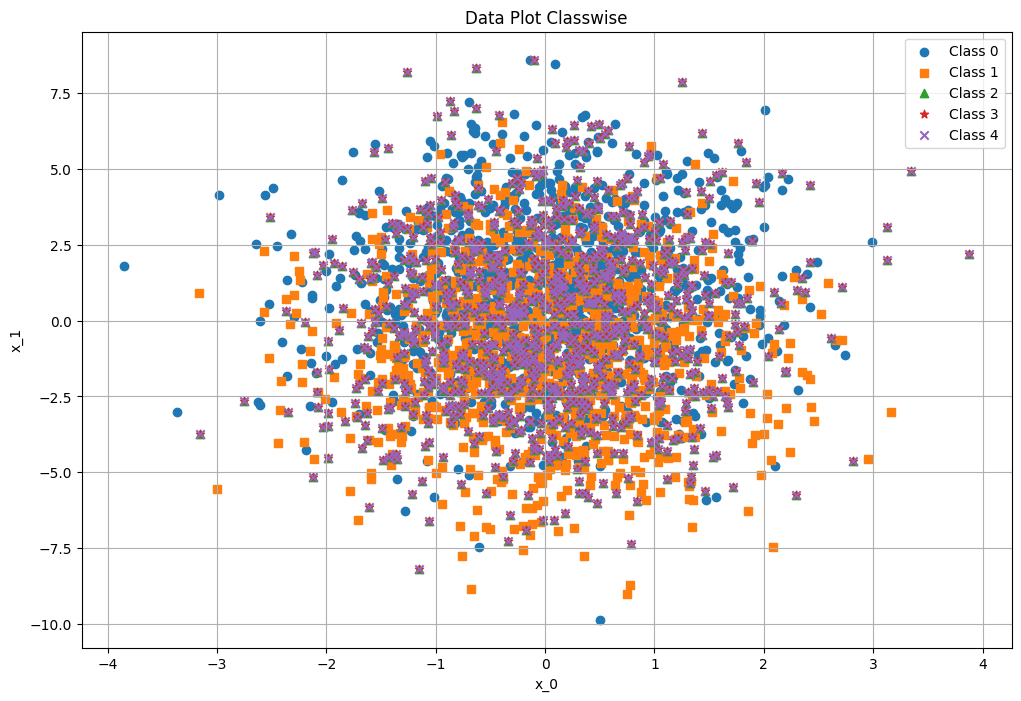

In [5]:


# Separate the data by class labels
class_0 = data[data['labels'] == 0]
class_1 = data[data['labels'] == 1]
class_2 = data[data['labels'] == 2]
class_2 = data[data['labels'] == 3]
class_2 = data[data['labels'] == 4]

# Plotting the data classwise
plt.figure(figsize=(12, 8))

plt.scatter(class_0['x_0'], class_0['x_1'], label='Class 0', marker='o')
plt.scatter(class_1['x_0'], class_1['x_1'], label='Class 1', marker='s')
plt.scatter(class_2['x_0'], class_2['x_1'], label='Class 2', marker='^')
plt.scatter(class_2['x_0'], class_2['x_1'], label='Class 3', marker='*')
plt.scatter(class_2['x_0'], class_2['x_1'], label='Class 4', marker='x')


plt.xlabel('x_0')
plt.ylabel('x_1')
plt.title('Data Plot Classwise')
plt.legend()
plt.grid(True)
plt.show()


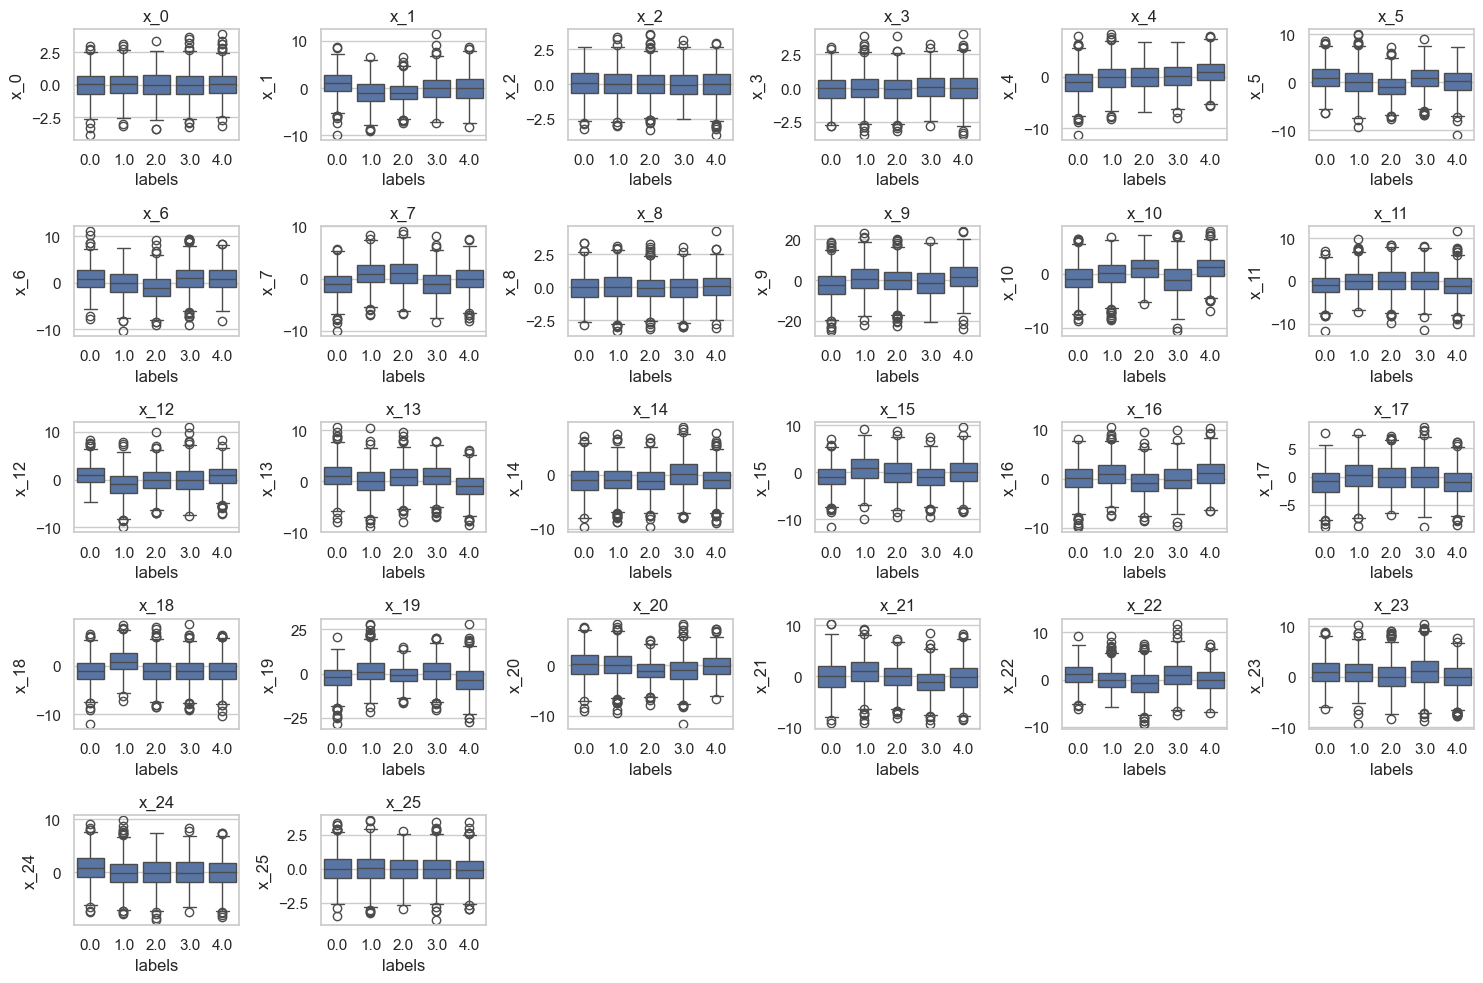

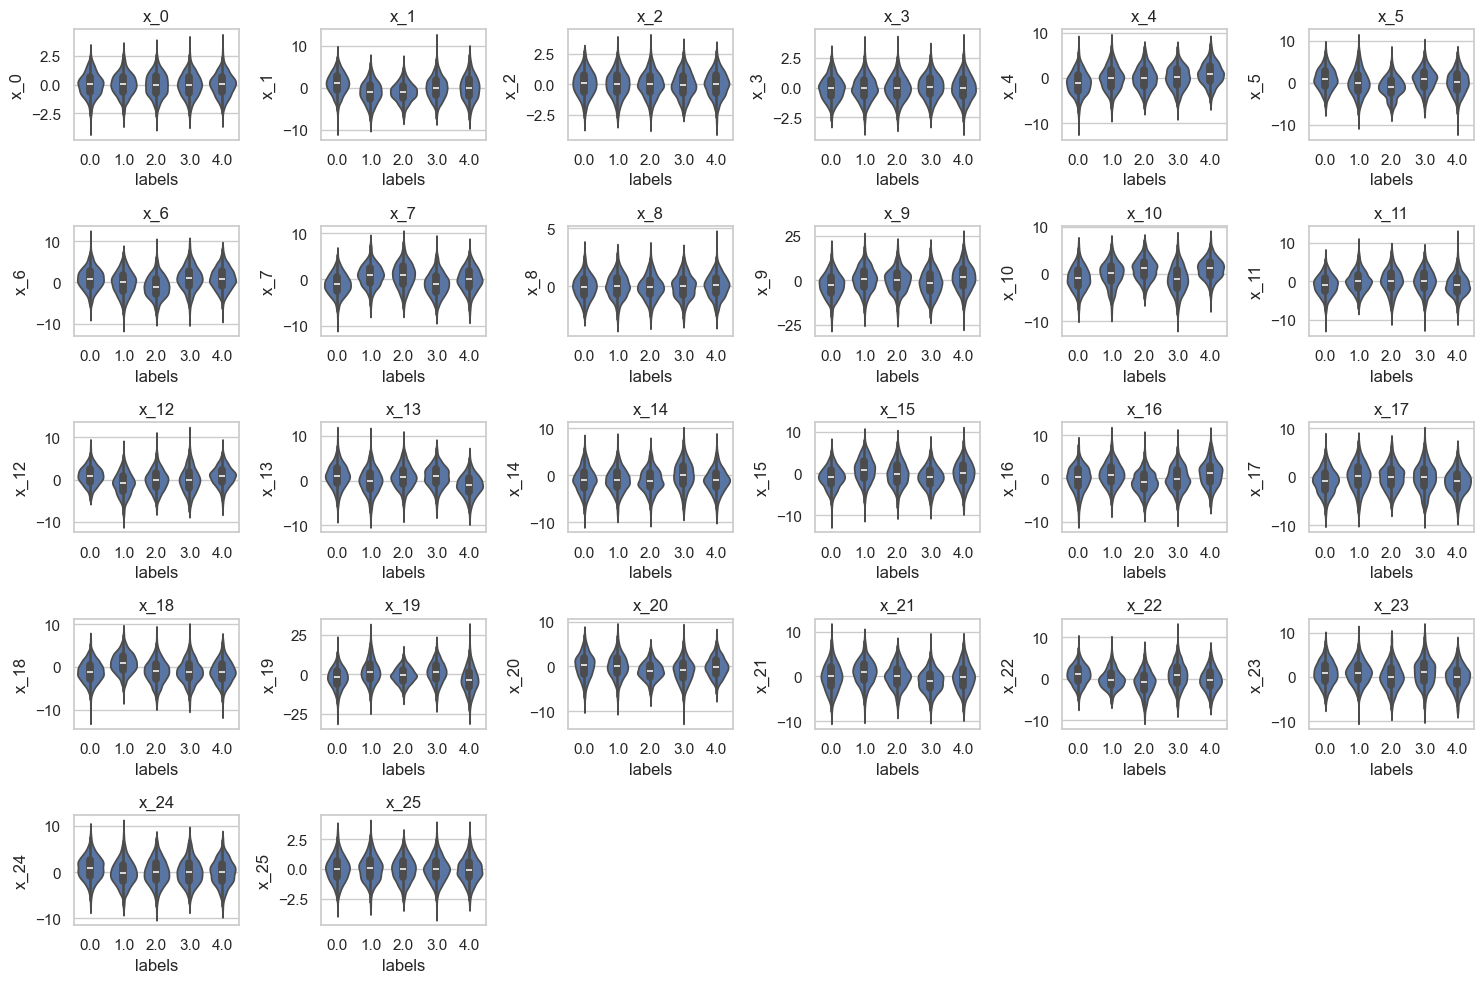

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plotting box plots for each feature classwise
plt.figure(figsize=(15, 10))
for i in range(26):  # Features x_0 to x_25
    plt.subplot(5, 6, i+1)
    sns.boxplot(x='labels', y=f'x_{i}', data=data)
    plt.title(f'x_{i}')

plt.tight_layout()
plt.show()

# Plotting violin plots for each feature classwise
plt.figure(figsize=(15, 10))
for i in range(26):  # Features x_0 to x_25
    plt.subplot(5, 6, i+1)
    sns.violinplot(x='labels', y=f'x_{i}', data=data)
    plt.title(f'x_{i}')

plt.tight_layout()
plt.show()


Accuracy: 0.28541666666666665


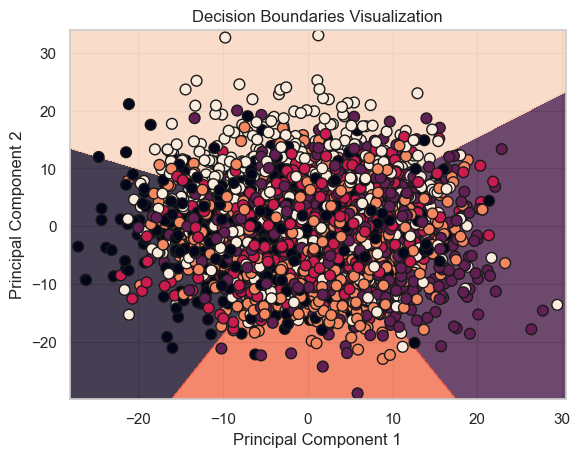

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' contains your feature data and 'y' contains your labels
X = data.drop(columns=['labels'])  # Features
y = data['labels']  # Labels

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a classifier (Logistic Regression in this case)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', s=60, linewidth=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries Visualization')
plt.show()


CLASS BALANCE CHECK

In [8]:
import pandas as pd

# Assuming 'data' is your dataset and 'labels' is the column containing class labels
class_counts = data['labels'].value_counts()
print(class_counts)


labels
0.0    975
2.0    965
3.0    958
1.0    956
4.0    946
Name: count, dtype: int64


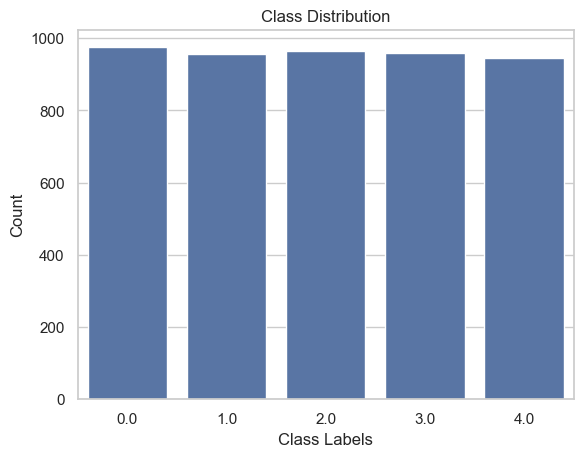

In [9]:
# Visualize class distribution using a bar chart
sns.countplot(x='labels', data=data)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [11]:
# Assuming 'data' is your DataFrame and 'labels' is the column containing class labels
mean_samples_per_class = data.groupby('labels').size().mean()

print(f"Mean number of samples per class: {mean_samples_per_class}")


class_std_dev = data.groupby('labels').size().std()
print(f'Standard Deviation of Class Distribution: {class_std_dev}')


Mean number of samples per class: 960.0
Standard Deviation of Class Distribution: 10.793516572461451
